In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset
------

In [2]:
df_raw = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')
df_raw.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


| Attribute | Description|
| -------- | -------- |
|**Serial Number**| Is just a unique set of digits to identify each transaction.|
|**List year**| This is the year that the particular property was put up for sale.|
|**Date Recorded**| Is the date that the transaction was completed. That is, the year the property was bought.|
|**Town**| The town where this property is located.|
|**Address**| The property's address.|
|**Assessed Value**| How much the property is generally considered to be worth.|
|**Sale Amount**| How much the property was actually sold for.|
|**Sales Ratio**| The ratio measures how close the selling price of the property is to it's assessed value.|
|**Property Type**| What kind of property it is.|
|**Residential Type**| If it is a residential property, what type is it.|
|**Years until sold**| Number of years before the property was finally sold.|

In [3]:
df_raw.dropna(inplace=True)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 91.3+ MB


In [5]:
# convert date recorded values into date type data
df_raw['Date Recorded'] = pd.to_datetime(df_raw['Date Recorded'], format='%m/%d/%Y')
df_raw.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


In [6]:
# check for duplicates from all columns
df_raw.duplicated().any()

False

In [7]:
# check for duplicates from selected columns
df_raw.duplicated(subset=['List Year','Address','Date Recorded','Years until sold']).any()

True

In [8]:
df_raw.sort_values(by=['Address']).tail(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
294139,40637,2004,2005-04-12,Milford,ZURKO FARM RD,49420,250000.0,0.19768,Nan,Nan,1
206386,31166,2003,2004-08-09,Milford,ZURKO FARM RD,98840,350000.0,0.28240,Nan,Nan,1
230930,31163,2003,2004-08-09,Milford,ZURKO FARM RD,247100,875000.0,0.28240,Nan,Nan,1
313175,40639,2004,2005-04-12,Milford,ZURKO FARM RD,49420,250000.0,0.19768,Nan,Nan,1
356106,59998,2005,2005-12-13,Hartford,parking space only,0,3500.0,0.00000,Nan,Nan,0


In [9]:
# it appears that some of the data are inconsistent because a property had multiple transactions within the same date with different assessed value, sale amount, and sale ratio
df_filtered = df_raw.drop_duplicates(subset=['List Year', 'Town', 'Address','Years until sold'])
df_filtered

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Nan,1
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,0
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,1
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,1
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,1
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,2020-06-24,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1


In [10]:
df_raw.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


-------------  
Data Cleaning for Numeric Data  
--------------

From the description about the data above, we can infer that there is inconsistent value in the 'Years until sold' column. It is not possible to have a negative value.

In [11]:
# display all negative values in "Years until sold" coloumn
df_filtered[(df_filtered['Years until sold'] < 0)].sort_values(by="Years until sold", ascending=True)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
857911,170177,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18
878446,173165,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16
882211,173202,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16
831964,170164,2017,2008-05-29,Clinton,6 OAKWOOD LN,116700,187500.0,0.622400,Single Family,Single Family,-9
851406,170107,2017,2008-06-13,Westbrook,84 PLYMOUTH RD,192500,304000.0,0.633224,Single Family,Single Family,-9
846821,17698,2017,2008-08-02,East Hartford,1073 TOLLAND ST.,101230,157000.0,0.644777,Single Family,Single Family,-9
864257,170207,2017,2008-07-03,Clinton,33 CARTER HILL RD,220400,330000.0,0.667879,Single Family,Single Family,-9
865255,170045,2017,2010-05-07,Washington,26 PARSONAGE LN,2260610,4250000.0,0.531900,Single Family,Single Family,-7
846137,170263,2017,2010-08-14,Bloomfield,115 WADHAMS RD,125580,215000.0,0.584093,Single Family,Single Family,-7
830573,170226,2017,2010-07-13,Bloomfield,39 WESLEYAN TERR,126000,140000.0,0.900000,Single Family,Single Family,-7


In [12]:
neg_years_until_sold = df_filtered[df_filtered['Years until sold'] < 0].shape[0]
print(f'Total negative values for "Years until sold" column: {neg_years_until_sold}')

Total negative values for "Years until sold" column: 56


I decided to drop all the rows that consist of negative values in the "Years until sold" column because the data is relatively small (56 rows) compared to the whole data, which is almost 1 million rows. Therefore, it would not affect the whole analysis that much.

In [13]:
# create new dataframe which consist only positive value for the "Years until sold" column
df1 = df_filtered.copy()
df1 = df1[df1['Years until sold'] >= 0]

# to make sure all values in "Years until sold" column are valid, I'm going to recalculate all the values by substracting list year and the year from date recorded
df1['Years until sold'] = df1['Date Recorded'].dt.year - df1['List Year']
df1.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500,325000.0,0.4630,Commercial,Nan,1
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000,430000.0,0.5883,Residential,Single Family,0
2,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.7248,Residential,Condo,1
3,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.6958,Residential,Single Family,1
4,200377,2020,2021-07-02,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.5957,Residential,Single Family,1


In [14]:
df1.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.616720e+05,961672.000000,9.616720e+05,9.616720e+05,9.616720e+05,961672.000000
mean,4.384235e+05,2010.269684,2.722355e+05,3.951581e+05,8.618162e+00,0.748671
std,6.630489e+06,6.230115,1.613154e+06,5.437931e+06,1.696565e+03,0.433833
min,8.100000e+01,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.049000e+04,2004.000000,8.820000e+04,1.430000e+05,4.866778e-01,0.000000
50%,7.047300e+04,2010.000000,1.388100e+05,2.276000e+05,6.226598e-01,1.000000
75%,1.600270e+05,2016.000000,2.256000e+05,3.650425e+05,7.770369e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


Based on the newest description above, there are some anomalies for the minimum assessed value and the maximum assessed value, sale amount, and sales ratio  
  
Therefore, I want to find total rows that consist of 0 value in at least 1 out of 4 criteria: serial number, assessed value, sale amount, and sales ratio

In [15]:
# display all rows with 0 value with these criteria
zero_serial_number = df1[df1['Serial Number'] == 0].shape[0]
zero_assessed_value = df1[df1['Assessed Value']==0].shape[0]
zero_sale_amount = df1[df1['Sale Amount']==0].shape[0]
zero_sales_ratio = df1[df1['Sales Ratio']==0].shape[0]

print(f'''
Total data with 0 value of serial number: {zero_serial_number}
Total data with 0 value of assessed value: {zero_assessed_value}
Total data with 0 value of sale amount: {zero_sale_amount}
Total data with 0 value of sales ratio: {zero_sales_ratio}
''')


Total data with 0 value of serial number: 0
Total data with 0 value of assessed value: 6427
Total data with 0 value of sale amount: 1575
Total data with 0 value of sales ratio: 7771



I want to check if there is any data that has at least 2 out of 3 criteria: assessed value, sale amount, and sales ratio.

In [16]:
mask = df1[(df1['Assessed Value'] == 0)
           | (df1['Sale Amount'] == 0)
           | (df1['Sales Ratio'] == 0)]

mask

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
75,10323,2001,2002-09-23,Coventry,400 EASTVIEW DR,0,325400.0,0.0,Nan,Nan,1
86,10045,2001,2002-01-03,Bethany,9 SIMPSON CT,96590,0.0,0.0,Nan,Nan,1
96,12532,2001,2002-08-13,Bolton,45 BEACON CT,0,12350.0,0.0,Nan,Nan,1
127,10055,2001,2001-12-04,Stafford,15 JENNIFER LN,0,165155.0,0.0,Nan,Nan,0
133,10502,2001,2002-01-15,Stratford,1101 SUCCESS AVE,0,50000.0,0.0,Nan,Nan,1
...,...,...,...,...,...,...,...,...,...,...,...
992904,190045,2019,2019-11-22,Windham,234 BEAVER HILL RD,0,30000.0,0.0,Nan,Nan,0
994922,190355,2019,2020-04-02,Oxford,1029 TURNBERRY CT,0,418905.0,0.0,Condo,Condo,1
996063,190290,2019,2020-06-04,Simsbury,24 HENDRICKS LANE,0,230450.0,0.0,Single Family,Single Family,1
996597,190409,2019,2020-07-01,Oxford,735 CHAMPIONSHIP DR,0,482850.0,0.0,Condo,Condo,1


In [17]:
# check for assessed value and sales ratio 
mask[(mask['Assessed Value'] > 0)
    & (mask['Sales Ratio'] > 0)]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


In [18]:
# check for sale amount and sales ratio
mask[(mask['Sale Amount'] > 0)
    & (mask['Sales Ratio'] > 0)]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


In [19]:
# check for assessed value and sale amount
mask[(mask['Assessed Value'] > 0)
    & (mask['Sale Amount'] > 0)]

# I've decided to not do anything with the result below because I think the gap between both values is a little bit odd.

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
9287,200088,2020,2021-02-16,Mansfield,12 SILO RD WEST,10,120000.0,0.0,Residential,Condo,1
17155,200186,2020,2021-06-14,Mansfield,9 VALLEY VIEW DR,5,143995.0,0.0,Residential,Single Family,1
38045,2000798,2020,2021-01-15,Stamford,93 GLENBROOK ROAD GARAGE #2,6970,72000000.0,0.0,Residential,Condo,1


From the previous insight, we can conclude that all **zero values in the Sales Ratio column** happened mostly   
because there is **zero value in the Assessed Value or Sale Amount column**

**Based on the property price on landsearch.com, the cheapest catalog is over $100. Therefore, there are several steps I would do:**
1. I will filter out all rows that have assessed value and sale amount less than 100 and assign the dataframe into a new variable
2. I will assume that the assessed value and sale amount have either the same number of digits or a maximum difference of 1 digit between them.  
Therefore, I have decided to adjust the digits to be equal if there is a difference of more than 1 digit since I got no extra information on the internet to adjust them better.
3. Create dictionaries for the assessed value and sale amount per address
4. Create dictionaries for the assessed value and sale amount per property type corresponding to the town

In [20]:
# filter out all rows that have assign value and sale amount less than 100 and assign the dataframe into a new variable
df1_assessed_and_sale_above100 = df1.copy()
df1_assessed_and_sale_above100 = df1[(df1['Sale Amount'] >= 100) & (df1['Assessed Value'] >= 100)].sort_values(by='Assessed Value', ascending=True)
df1_assessed_and_sale_above100

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
358557,50138,2005,2006-04-03,Old Saybrook,175 FERRY RD 14,100,475000.0,0.000211,Nan,Nan,1
569452,10616,2010,2011-09-13,Wethersfield,30 CALIBER LN,100,230000.0,0.000435,Nan,Nan,1
387250,50178,2005,2006-05-16,Old Saybrook,175 FERRY RD 27,100,561228.0,0.000178,Nan,Nan,1
23750,20018,2020,2021-01-21,Andover,24 SKINNER HILL RD,100,231000.0,0.000400,Residential,Single Family,1
433070,60004,2006,2006-10-05,Brooklyn,POMFRET RD,100,5000.0,0.020000,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
390454,60270,2006,2007-01-12,Greenwich,EAST PUTNAM AVE,122935400,181700000.0,0.676584,Nan,Nan,1
811130,160270,2016,2016-12-21,New Britain,100 GRAND ST,131072830,120000.0,1092.273583,Nan,Nan,0
759246,150017,2015,2015-10-19,Suffield,TAINTOR ST,138958820,40356.0,3443.324908,Nan,Nan,0
993748,190201,2019,2019-11-13,Waterbury,64 ROBBINS ST,142858700,230043624.0,0.621000,Nan,Nan,0


In [21]:
# Iterate each row to ensure the sales amount digits are equal or equal+1 with the assessed value, and vice versa
for index,row in df1_assessed_and_sale_above100.iterrows():
    assessed_value = row['Assessed Value']
    assessed_value_digits = len(str(assessed_value))

    sale_amount = row['Sale Amount']
    sale_amount_digits = len(str(sale_amount).split('.', 1)[0])

    sales_ratio = row['Sales Ratio']

    diff = abs(assessed_value_digits - sale_amount_digits)

    # handling possible conditions
    if (assessed_value_digits > sale_amount_digits) and (diff > 1):
        sale_amount *= 10**diff
        sales_ratio = round(assessed_value / sale_amount, 5)

    elif (sale_amount_digits > assessed_value_digits) and (diff > 1):
        assessed_value *= 10**diff
        sales_ratio = round(assessed_value / sale_amount, 5)

    # Update values in the DataFrame using loc
    df1_assessed_and_sale_above100.at[index, 'Sale Amount'] = sale_amount
    df1_assessed_and_sale_above100.at[index, 'Assessed Value'] = assessed_value
    df1_assessed_and_sale_above100.at[index, 'Sales Ratio'] = sales_ratio

In [22]:
# create a dict for mean of the Assessed Value column per address
# I don't include the property type because the same address should have the same type
mean_assessed_value_per_address = df1_assessed_and_sale_above100[(df1_assessed_and_sale_above100['Property Type']!='Nan')
                                                                 & (df1_assessed_and_sale_above100['Residential Type']!='Nan')].groupby(['Address']).mean().round(0).sort_values(by='Address')['Assessed Value'].to_dict()
mean_assessed_value_per_address

{'#110 &L77 RANSOM HALL RD': 154710.0,
 '#12 #112 #193 #205 #238 #248 #': 216020.0,
 '#13 VILLAS AT RIVER HEIGHTS': 281000.0,
 '#27 DUCK ISLAND YACHT CLUB': 26520.0,
 '#3625 NIANTIC DOCKOMINIUM': 25200.0,
 '#4 HENRYS MOBILE HOME PARK': 10870.0,
 '#50 FOX HILL GARAGE': 7350.0,
 '(2 MIMOSA DRIVE)2 DAFFODIL LAN': 1344840.0,
 '0 & 11 MORGAN ST': 297570.0,
 '0 & 26 JAMESON ST': 134590.0,
 '0 & 3 KINLOCH TERRACE': 245760.0,
 '0 & 35 OLD MILL RD': 702900.0,
 '0 & 502 PLEASANT VALLEY RD SOU': 125090.0,
 '0 & 52 RIVERVIEW AVE': 616280.0,
 '0 & 6 RIVER LN': 808700.0,
 '0 & 91 SHELTER COVE RD': 465700.0,
 '0 + 52 WALES RD': 222988.0,
 '0 ALDEN STREET UNIT A': 210240.0,
 '0 BAILEY POND RD': 76650.0,
 '0 BARN HILL RD LOT 2C & 2D': 1343710.0,
 '0 BARN HILL ROAD': 707970.0,
 '0 BAYBERRY LANE': 144800.0,
 '0 BEDFORD ST GARAGE G-2-5': 15540.0,
 '0 BEDFORD STREET G-1-6': 14810.0,
 '0 BEDFORD STREET GARAGE G-1-2': 15540.0,
 '0 BETTS IS': 516730.0,
 '0 BRIDGEWATER': 169440.0,
 '0 BROOKDALE DRIVE': 442640.

In [23]:
# create a dict for mean of the Sale Amount column per address
# I don't include the property type because the same address should have the same type
mean_sale_amount_per_address = df1_assessed_and_sale_above100[(df1_assessed_and_sale_above100['Property Type']!='Nan')
                                                                 & (df1_assessed_and_sale_above100['Residential Type']!='Nan')].groupby(['Address']).mean().round(0).sort_values(by='Address')['Sale Amount'].to_dict()
mean_sale_amount_per_address

{'#110 &L77 RANSOM HALL RD': 290000.0,
 '#12 #112 #193 #205 #238 #248 #': 335000.0,
 '#13 VILLAS AT RIVER HEIGHTS': 350720.0,
 '#27 DUCK ISLAND YACHT CLUB': 40000.0,
 '#3625 NIANTIC DOCKOMINIUM': 40000.0,
 '#4 HENRYS MOBILE HOME PARK': 8000.0,
 '#50 FOX HILL GARAGE': 19000.0,
 '(2 MIMOSA DRIVE)2 DAFFODIL LAN': 1675000.0,
 '0 & 11 MORGAN ST': 408500.0,
 '0 & 26 JAMESON ST': 170000.0,
 '0 & 3 KINLOCH TERRACE': 300000.0,
 '0 & 35 OLD MILL RD': 950000.0,
 '0 & 502 PLEASANT VALLEY RD SOU': 40000.0,
 '0 & 52 RIVERVIEW AVE': 731000.0,
 '0 & 6 RIVER LN': 840000.0,
 '0 & 91 SHELTER COVE RD': 580000.0,
 '0 + 52 WALES RD': 425000.0,
 '0 ALDEN STREET UNIT A': 342000.0,
 '0 BAILEY POND RD': 7000.0,
 '0 BARN HILL RD LOT 2C & 2D': 895000.0,
 '0 BARN HILL ROAD': 770000.0,
 '0 BAYBERRY LANE': 175500.0,
 '0 BEDFORD ST GARAGE G-2-5': 325000.0,
 '0 BEDFORD STREET G-1-6': 339400.0,
 '0 BEDFORD STREET GARAGE G-1-2': 347500.0,
 '0 BETTS IS': 400000.0,
 '0 BRIDGEWATER': 375000.0,
 '0 BROOKDALE DRIVE': 485100.

In [24]:
# create a dict for mean of the Assessed Value column per town and property type
mean_assessed_value_per_town = df1_assessed_and_sale_above100.groupby(['Town','Property Type']).mean().round(0).sort_values(by='Town')['Assessed Value'].to_dict()
mean_assessed_value_per_town

{('***Unknown***', 'Single Family'): 66540.0,
 ('Andover', 'Nan'): 94300.0,
 ('Andover', 'Residential'): 176346.0,
 ('Andover', 'Single Family'): 175162.0,
 ('Andover', 'Two Family'): 158184.0,
 ('Andover', 'Vacant Land'): 212729.0,
 ('Ansonia', 'Vacant Land'): 61370.0,
 ('Ansonia', 'Two Family'): 127592.0,
 ('Ansonia', 'Three Family'): 142221.0,
 ('Ansonia', 'Single Family'): 136143.0,
 ('Ansonia', 'Residential'): 129499.0,
 ('Ansonia', 'Industrial'): 253000.0,
 ('Ansonia', 'Four Family'): 158248.0,
 ('Ansonia', 'Condo'): 111300.0,
 ('Ansonia', 'Commercial'): 343212.0,
 ('Ansonia', 'Apartments'): 244850.0,
 ('Ansonia', 'Nan'): 129481.0,
 ('Ashford', 'Single Family'): 137805.0,
 ('Ashford', 'Vacant Land'): 35476.0,
 ('Ashford', 'Two Family'): 169568.0,
 ('Ashford', 'Residential'): 139845.0,
 ('Ashford', 'Three Family'): 363700.0,
 ('Ashford', 'Condo'): 41580.0,
 ('Ashford', 'Nan'): 132060.0,
 ('Ashford', 'Commercial'): 186900.0,
 ('Ashford', 'Apartments'): 1520250.0,
 ('Avon', 'Two Fam

In [25]:
# create a dict for mean of the Sale Amount column per town and property type
mean_sale_amount_per_town = df1_assessed_and_sale_above100.groupby(['Town','Property Type']).mean().round(0).sort_values(by='Town')['Sale Amount'].to_dict()
mean_sale_amount_per_town

{('***Unknown***', 'Single Family'): 282450.0,
 ('Andover', 'Nan'): 191894.0,
 ('Andover', 'Residential'): 313701.0,
 ('Andover', 'Single Family'): 239968.0,
 ('Andover', 'Two Family'): 264100.0,
 ('Andover', 'Vacant Land'): 122396.0,
 ('Ansonia', 'Vacant Land'): 155100.0,
 ('Ansonia', 'Two Family'): 171486.0,
 ('Ansonia', 'Three Family'): 206301.0,
 ('Ansonia', 'Single Family'): 187080.0,
 ('Ansonia', 'Residential'): 254531.0,
 ('Ansonia', 'Industrial'): 550000.0,
 ('Ansonia', 'Four Family'): 224952.0,
 ('Ansonia', 'Condo'): 137827.0,
 ('Ansonia', 'Commercial'): 336875.0,
 ('Ansonia', 'Apartments'): 490000.0,
 ('Ansonia', 'Nan'): 231892.0,
 ('Ashford', 'Single Family'): 197467.0,
 ('Ashford', 'Vacant Land'): 57218.0,
 ('Ashford', 'Two Family'): 154450.0,
 ('Ashford', 'Residential'): 250076.0,
 ('Ashford', 'Three Family'): 126000.0,
 ('Ashford', 'Condo'): 62606.0,
 ('Ashford', 'Nan'): 216842.0,
 ('Ashford', 'Commercial'): 182219.0,
 ('Ashford', 'Apartments'): 3372453.0,
 ('Avon', 'Two 

**For the next step, I will handle the rows that have value less than 100 in the Assessed Value and/or Sale Amount column**  
1. I'm going to **replace all the 0 values in the Assessed Value and Sale Amount column withh the mean value** that I've got before, in which the mean of both values per address will be prioritized.
2. As for the following step, I will assume that both values have either the same number of digits or a maximum difference of 1 digit between them. Therefore, I have decided to **adjust the digits to be equal** if there is a difference of more than 1 digit since I got no extra information on the internet to adjust them better.

In [26]:
# get all rows consisting of 0 value in assessed value or sale amount but I don't want to use data that have a value less than 100 in both columns
df1_assessed_or_sale_eq0 = df1.copy()
df1_assessed_or_sale_eq0 = df1[((df1['Sale Amount'] == 0) & (df1['Assessed Value'] >= 100))
                               | ((df1['Sale Amount'] >= 100) & (df1['Assessed Value'] == 0)) ]

In [27]:
for index,row in df1_assessed_or_sale_eq0.iterrows():
    # variable initiation
    town = row['Town']
    address = row['Address']
    assessed_value = row['Assessed Value']
    sale_amount = row['Sale Amount']
    sales_ratio = row['Sales Ratio']
    property_type = row['Property Type']

    # replace 0 value in the Assessed Value and/or Sale Amount column
    if assessed_value == 0:
        if address in mean_assessed_value_per_address:
            assessed_value = mean_assessed_value_per_address[address]
        else:
            assessed_value = mean_assessed_value_per_town[(town, property_type)]
    if sale_amount == 0:
        if address in mean_sale_amount_per_address:
            sale_amount = mean_sale_amount_per_address[address]
        else:
            sale_amount = mean_sale_amount_per_town[(town, property_type)]

    # get the digits difference length between the assessed value and the sale amount
    assessed_value_digits = len(str(assessed_value).split('.', 1)[0])
    sale_amount_digits = len(str(sale_amount).split('.', 1)[0])
    diff_digits = abs(assessed_value_digits - sale_amount_digits)

    # adjust the digits by multiplying with 10**diff_digits
    if (assessed_value_digits > sale_amount_digits) and (diff_digits > 1): 
        sale_amount *= 10**diff_digits
    elif (sale_amount_digits > assessed_value_digits) and (diff_digits > 1):
        assessed_value *= 10**diff_digits

    # update the sales ratio
    sales_ratio = round(assessed_value / sale_amount, 5)

    # Update values in the DataFrame using loc
    df1_assessed_or_sale_eq0.loc[index, 'Sale Amount'] = sale_amount
    df1_assessed_or_sale_eq0.loc[index, 'Assessed Value'] = assessed_value
    df1_assessed_or_sale_eq0.loc[index, 'Sales Ratio'] = sales_ratio

c:\Python39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


To finish the numeric data cleaning, I will concatenat df1_assessed_or_sale_eq0 and df1_assessed_and_sale_above0

In [28]:
df1_numeric_clean = pd.concat([df1_assessed_and_sale_above100,df1_assessed_or_sale_eq0])

In [29]:
df1_numeric_clean.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,9.612810e+05,961281.000000,9.612810e+05,9.612810e+05,961281.000000,961281.000000
mean,4.385587e+05,2010.271819,2.961177e+05,4.446196e+05,0.816615,0.748652
std,6.631811e+06,6.229849,3.012896e+06,5.668783e+06,1.606644,0.433844
min,8.100000e+01,2001.000000,1.000000e+02,1.000000e+02,0.010833,0.000000
25%,3.049000e+04,2004.000000,9.022000e+04,1.450000e+05,0.491741,0.000000
50%,7.048000e+04,2010.000000,1.407700e+05,2.300000e+05,0.626080,1.000000
75%,1.600280e+05,2016.000000,2.287500e+05,3.700000e+05,0.782000,1.000000
max,2.000500e+09,2020.000000,2.238530e+09,5.000000e+09,99.411200,4.000000


--------------
Data Cleaning for String Data
------------------------------------------------------------

In [30]:
df2 = df1_numeric_clean.copy()

In [31]:
(df2 == 'Nan').value_counts()

Serial Number  List Year  Date Recorded  Town   Address  Assessed Value  Sale Amount  Sales Ratio  Property Type  Residential Type  Years until sold
False          False      False          False  False    False           False        False        False          False             False               594141
                                                                                                   True           True              False               361528
                                                                                                   False          True              False                 5588
                                                True     False           False        False        True           True              False                   20
                                                                                                   False          False             False                    4
dtype: int64

In [32]:
df2['Property Type'].value_counts()

Single Family     391260
Nan               361548
Condo             103442
Residential        59691
Two Family         25521
Three Family       12129
Vacant Land         2941
Four Family         2102
Commercial          1938
Apartments           479
Industrial           226
Public Utility         4
Name: Property Type, dtype: int64

In [33]:
df2['Residential Type'].value_counts()

Single Family    433868
Nan              367136
Condo            115654
Two Family        28665
Three Family      13596
Four Family        2362
Name: Residential Type, dtype: int64

Based on the insight about property types and the research I did on study.com, I've decided to devide the property types into 5 groups:
1. Residential (Singe Family, Multi-Family, Condo, Apartment)
2. Industrial
3. Commercial
4. Public Utility
5. Vacant Land

In [34]:
# update the residential type first
df2['Residential Type'] = df2.apply(lambda type: type['Property Type']
                                    if type['Property Type'] in ['Single Family', 'Two Family', 'Three Family', 'Four Family','Condo', 'Apartments']
                                    else type['Residential Type'], axis=1)

df2['Residential Type'].value_counts()

Single Family    433868
Nan              366657
Condo            115654
Two Family        28665
Three Family      13596
Four Family        2362
Apartments          479
Name: Residential Type, dtype: int64

In [35]:
# update the property type
df2['Property Type'] = df2['Property Type'].apply(lambda type: 'Residential'
                                                  if type in ['Single Family', 'Two Family', 'Three Family', 'Four Family','Condo', 'Apartments']
                                                  else type)

df2['Property Type'].value_counts()

Residential       594624
Nan               361548
Vacant Land         2941
Commercial          1938
Industrial           226
Public Utility         4
Name: Property Type, dtype: int64

In [36]:
df2[(df2['Property Type']=='Public Utility')]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
56950,20412,2020,2021-05-26,Waterford,296 WILLETTS AVE EXT,18490,34594.0,0.534486,Public Utility,Nan,1
13684,201322,2020,2021-09-01,Griswold,29 RICHARD AVE,3451000,1400000.0,2.465000,Public Utility,Nan,1
32215,20049,2020,2020-11-16,Plainfield,45 SPAULDING RD,117920,39000.0,3.023590,Public Utility,Nan,0
4280,20000275,2020,2021-09-20,Granby,30 FIRETOWN RD,154210,315000.0,0.489500,Public Utility,Nan,1


To determine the property type and the residential type, I'm going to use machine learning to classify the data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pickle

In [38]:
df2_ml = df2[['Assessed Value', 'Sale Amount', 'Sales Ratio', 'Years until sold', 'Property Type', 'Residential Type']].copy()
df2_ml['Property Type'].value_counts()

Residential       594624
Nan               361548
Vacant Land         2941
Commercial          1938
Industrial           226
Public Utility         4
Name: Property Type, dtype: int64

In [39]:
# filter the dataset from Nan values
df2_ml_not_nan_pt = df2_ml[df2_ml['Property Type'] != 'Nan'].drop('Residential Type', axis=1)
df2_ml_not_nan_pt

,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Property Type
23750,100000,231000.0,0.43290,1,Residential
610046,100000,366000.0,0.27322,1,Residential
453243,100000,435400.0,0.22967,0,Residential
835864,100000,262500.0,0.38095,1,Residential
529368,100000,279000.0,0.35842,1,Residential
...,...,...,...,...,...
992641,249297,360730.0,0.69109,1,Residential
994922,249297,418905.0,0.59512,1,Residential
996063,236849,230450.0,1.02777,1,Residential
996597,249297,482850.0,0.51630,1,Residential


1. Prediction for Property Type

In [40]:
# split the dataset
pt_train, pt_test = train_test_split(df2_ml_not_nan_pt, test_size=0.6, random_state= 42, shuffle= True)


In [41]:
pt_train[['Property Type']].value_counts()

Property Type
Residential      237905
Vacant Land        1170
Commercial          726
Industrial           92
dtype: int64

In [42]:
def scale_dataset(data, target_column, oversample=False):
    X = data[data.columns[:-1]].values
    y = data[target_column].values

    # scale the feature data to make the value range more reasonable and help the computer learn more efficient
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # oversampling data to make the data distribution more balance
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
    
    
    data = np.hstack([X,y.reshape(-1,1)])

    return data,  X, y

In [43]:
# scale and oversample train and test dataset
pt_train, pt_X_train, pt_y_train = scale_dataset(pt_train, 'Property Type', oversample=True)
pt_test, pt_X_test, pt_y_test = scale_dataset(pt_test, 'Property Type', oversample=False)

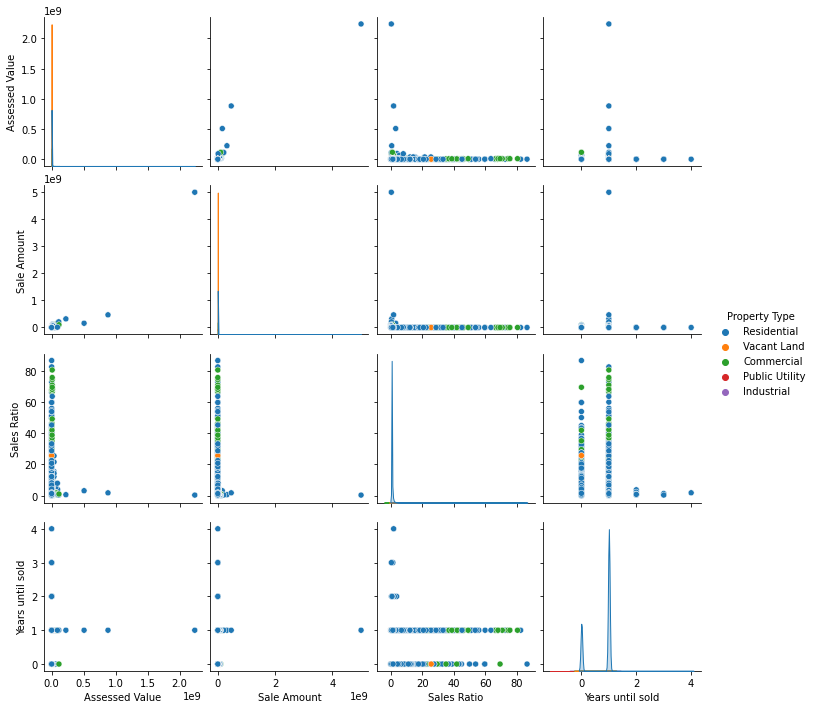

In [44]:
import seaborn as sns 
sns.pairplot(df2_ml_not_nan_pt, hue= 'Property Type')

Since the data points that we have are overlapping one another, the kNN model would perform great in this scenario because the kNN model is based on Euclidean Distance, which the model will predict the class of a point based on its nearby points. It's good for situations where different classes mix in the data.

In [45]:
knn = KNeighborsClassifier()
knn.fit(pt_X_train, pt_y_train) # train knn

# make prediction
pt_y_pred = knn.predict(pt_X_test)

# test set evaluation
report = classification_report(pt_y_test, pt_y_pred)
knn_accuracy_score = accuracy_score(pt_y_test, pt_y_pred)
knn_precision_score = precision_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_recall_score = recall_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_f1_score = f1_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average

print('-'*35)
print(f'Accuracy Score: {round(knn_accuracy_score,5)}')
print(f'Precision Score: {round(knn_precision_score,5)}')
print(f'Recall Score: {round(knn_recall_score,5)}')
print(f'F1 Score: {round(knn_f1_score,5)}')
print(f'Labels with no predicted samples: {set(np.unique(pt_y_test)) - set(np.unique(pt_y_pred))}')
print('-'*35)

c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-----------------------------------
Accuracy Score: 0.97289
Precision Score: 0.98313
Recall Score: 0.97289
F1 Score: 0.97796
Labels with no predicted samples: {'Public Utility'}
-----------------------------------


In [46]:
# define the parameters
knn_params = {
    'n_neighbors': range(1,21,2)
}

# grid search
cv = StratifiedKFold(n_splits= 10)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_params, cv=cv, scoring='accuracy', verbose=2)
grid_result = grid_search.fit(pt_X_train, pt_y_train)

# final model and make prediction
final_knn = KNeighborsClassifier(**grid_result.best_params_)
final_knn.fit(pt_X_train, pt_y_train)
pt_y_pred = final_knn.predict(pt_X_test)

# test set evaluation
knn_accuracy_score = accuracy_score(pt_y_test, pt_y_pred)
knn_precision_score = precision_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_recall_score = recall_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_f1_score = f1_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average

print('-'*35)
print(f'Accuracy Score: {round(knn_accuracy_score,5)}')
print(f'Precision Score: {round(knn_precision_score,5)}')
print(f'Recall Score: {round(knn_recall_score,5)}')
print(f'F1 Score: {round(knn_f1_score,5)}')
print(f'Labels with no predicted samples: {set(np.unique(pt_y_test)) - set(np.unique(pt_y_pred))}')
print(f'Best parameters: {grid_result.best_params_}')
print('-'*35)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END ......................................n_neighbors=1; total time=   8.1s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   8.3s
[CV] END ......................................n_neighbors=1; total time=   8.3s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   8.2s
[CV] END ......................................n_neighbors=1; total time=   8.0s
[CV] END ......................................n_neighbors=1; total time=   8.3s
[CV] END ......................................n_neighbors=3; total time=   8.5s
[CV] END .....................................

In [47]:
# save knn model
knn_property_type = pickle.dumps(final_knn)

Predict the property type of a feature data that have "Nan" value in the Property Type column

In [48]:
# get all row consisting of "Nan" in the Property Type column
df2_pt_predict = df2_ml[df2_ml['Property Type'] == 'Nan'].drop('Residential Type', axis=1).copy()
df2_pt_predict.head()

,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Property Type
358557,100000,475000.0,0.21053,1,Nan
569452,100000,230000.0,0.43478,1,Nan
387250,100000,561228.0,0.17818,1,Nan
433070,100,5000.0,0.02000,0,Nan
300041,10000,90000.0,0.11111,1,Nan


In [49]:
# predict the data using the final_knn model
best_knn_property = pickle.loads(knn_property_type)
nan_pt_predict = best_knn_property.predict(df2_pt_predict[df2_pt_predict.columns[:-1]].values)
nan_pt_predict

array(['Residential', 'Residential', 'Residential', ..., 'Residential',
       'Residential', 'Residential'], dtype=object)

In [50]:
# update the all the Nan(s) in the Property Type column with the predicted value
df2_pt_predict['Property Type'] = nan_pt_predict.reshape(-1,)

# combine predicted property type dataframe with the non_nan property type dataframe
df2_pt_predict_done = pd.concat([df2_pt_predict, df2_ml_not_nan_pt])

# update the dataframe that we've prepared to perform machine learning in the beginning so that we can use for the next prediction
df2_ml[df2_ml.columns[:-1]] = df2_pt_predict_done.reindex(df2_ml.index) # use reindex to match indices of df2_ml
df2_ml.head()


,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Property Type,Residential Type
358557,100000,475000.0,0.21053,1,Residential,Nan
569452,100000,230000.0,0.43478,1,Residential,Nan
387250,100000,561228.0,0.17818,1,Residential,Nan
23750,100000,231000.0,0.43290,1,Residential,Single Family
433070,100,5000.0,0.02000,0,Residential,Nan


In [51]:
df2_ml['Property Type'].value_counts()

Residential       956172
Vacant Land         2941
Commercial          1938
Industrial           226
Public Utility         4
Name: Property Type, dtype: int64

Now, I'm going to predict what is the residential type for residential property

In [52]:
df2_ml_rt = df2_ml[df2_ml['Property Type'] == 'Residential'].copy()

In [53]:
df2_ml_rt.head()

,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Property Type,Residential Type
358557,100000,475000.0,0.21053,1,Residential,Nan
569452,100000,230000.0,0.43478,1,Residential,Nan
387250,100000,561228.0,0.17818,1,Residential,Nan
23750,100000,231000.0,0.43290,1,Residential,Single Family
433070,100,5000.0,0.02000,0,Residential,Nan


In [54]:
df2_ml_rt[['Residential Type']].value_counts()

Residential Type
Single Family       433868
Nan                 361548
Condo               115654
Two Family           28665
Three Family         13596
Four Family           2362
Apartments             479
dtype: int64

In [55]:
df2_ml_non_nan_rt = df2_ml_rt[df2_ml_rt['Residential Type'] != 'Nan'].drop('Property Type', axis= 1).copy()
df2_ml_non_nan_rt

,Assessed Value,Sale Amount,Sales Ratio,Years until sold,Residential Type
23750,100000,231000.0,0.43290,1,Single Family
610046,100000,366000.0,0.27322,1,Condo
453243,100000,435400.0,0.22967,0,Condo
835864,100000,262500.0,0.38095,1,Single Family
529368,100000,279000.0,0.35842,1,Condo
...,...,...,...,...,...
992641,249297,360730.0,0.69109,1,Condo
994922,249297,418905.0,0.59512,1,Condo
996063,236849,230450.0,1.02777,1,Single Family
996597,249297,482850.0,0.51630,1,Condo


In [56]:
rt_train, rt_test = train_test_split(df2_ml_non_nan_rt, test_size= 0.6, random_state= 42, shuffle= True)

In [57]:
rt_train, rt_X_train, rt_y_train = scale_dataset(rt_train, 'Residential Type', oversample= True)
rt_test, rt_X_test, rt_y_test = scale_dataset(rt_test, 'Residential Type', oversample= False)

In [58]:
knn_residential = KNeighborsClassifier()

knn_residential.fit(rt_X_train, rt_y_train)
rt_y_pred = knn_residential.predict(rt_X_test)

# result
accuracy = accuracy_score(rt_y_test, rt_y_pred)
precision = precision_score(rt_y_test, rt_y_pred, average= 'weighted') 
recall = recall_score(rt_y_test, rt_y_pred, average= 'weighted')
f1 = f1_score(rt_y_test, rt_y_pred, average= 'weighted')


print('-'*35)
print(f'Accuracy = {accuracy}')
print(f'Precision Score = {precision}')
print(f'Recall Score = {recall}')
print(f'F1-score = {f1}')
print('-'*35)

-----------------------------------
Accuracy = 0.4343185481045477
Precision Score = 0.6199704191873292
Recall Score = 0.4343185481045477
F1-score = 0.4649595365785187
-----------------------------------


In [59]:
models = {
    'k-Nearest-Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for i in range (len(list(models))):
    model = list(models.values())[i]

    model.fit(rt_X_train, rt_y_train)
    rt_y_pred = model.predict(rt_X_test)

    # result
    accuracy = accuracy_score(rt_y_test, rt_y_pred)
    precision = precision_score(rt_y_test, rt_y_pred, average= 'weighted') 
    recall = recall_score(rt_y_test, rt_y_pred, average= 'weighted')
    f1 = f1_score(rt_y_test, rt_y_pred, average= 'weighted')


    print('-'*35)
    print(list(models.keys())[i])
    print('-'*35)
    print(f'Accuracy = {accuracy}')
    print(f'Precision Score = {precision}')
    print(f'Recall Score = {recall}')
    print(f'F1-score = {f1}')
    print('-'*35)
    print()

-----------------------------------
k-Nearest-Neighbors
-----------------------------------
Accuracy = 0.4343185481045477
Precision Score = 0.6199704191873292
Recall Score = 0.4343185481045477
F1-score = 0.4649595365785187
-----------------------------------

-----------------------------------
Naive Bayes
-----------------------------------
Accuracy = 0.43295354214841286
Precision Score = 0.610617527682344
Recall Score = 0.43295354214841286
F1-score = 0.4869036865296442
-----------------------------------

-----------------------------------
Decision Tree
-----------------------------------
Accuracy = 0.5168803867984023
Precision Score = 0.6044374891792221
Recall Score = 0.5168803867984023
F1-score = 0.5460775846816179
-----------------------------------

-----------------------------------
Random Forest
-----------------------------------
Accuracy = 0.6074388620278888
Precision Score = 0.6196811845176858
Recall Score = 0.6074388620278888
F1-score = 0.6053027904932687
----------------

In [60]:
rfc_params = 
    'n_estimators': [10, 100],
    'criterion': ['gini'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [6, 10, 15, 20]
}

# grid search
cv = StratifiedKFold(n_splits= 10)
random_search = RandomizedSearchCV(estimator= RandomForestClassifier(),
                                 param_distributions= rfc_params,
                                 cv= cv,
                                 n_iter= 10,
                                 scoring= 'accuracy',
                                 verbose= 2,
                                 random_state= 42)
random_result = random_search.fit(rt_X_train, rt_y_train)

# final random forest classifier
final_rfc = RandomForestClassifier(**grid_result.best_params_)
final_rfc.fit(rt_X_train, rt_y_train)
rt_y_pred = final_rfc.predict(rt_X_test)

# test set evaluation
knn_accuracy_score = accuracy_score(pt_y_test, pt_y_pred)
knn_precision_score = precision_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_recall_score = recall_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average
knn_f1_score = f1_score(pt_y_test, pt_y_pred, average='weighted', zero_division=0)  # Choose the appropriate average

print('-'*35)
print(f'Accuracy Score: {round(knn_accuracy_score,5)}')
print(f'Precision Score: {round(knn_precision_score,5)}')
print(f'Recall Score: {round(knn_recall_score,5)}')
print(f'F1 Score: {round(knn_f1_score,5)}')
print(f'Labels with no predicted samples: {set(np.unique(rt_y_test)) - set(np.unique(rt_y_pred))}')
print(f'Best parameters: {random_result.best_params_}')
print('-'*35)

SyntaxError: invalid syntax (Temp/ipykernel_22236/3843655804.py, line 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use LabelEncoder to convert string labels to numerical labels
label_encoder = LabelEncoder()
rt_y_train_encoded = label_encoder.fit_transform(rt_y_train)
rt_y_test_encoded = label_encoder.transform(rt_y_test)

# Create and train the XGBoost classifier
boost = XGBClassifier()
boost.fit(rt_X_train, rt_y_train_encoded)
rt_y_pred_encoded = boost.predict(rt_X_test)

# Decode the predictions back to original labels if needed
rt_y_pred = label_encoder.inverse_transform(rt_y_pred_encoded)

# Calculate metrics
accuracy = accuracy_score(rt_y_test, rt_y_pred)
precision = precision_score(rt_y_test, rt_y_pred, average='weighted')
recall = recall_score(rt_y_test, rt_y_pred, average='weighted')
f1 = f1_score(rt_y_test, rt_y_pred, average='weighted')

print('-'*35)
print(f'Accuracy = {accuracy}')
print(f'Precision Score = {precision}')
print(f'Recall Score = {recall}')
print(f'F1-score = {f1}')
print('-'*35)


-----------------------------------
Accuracy = 0.425509074346577
Precision Score = 0.6534518925314389
Recall Score = 0.425509074346577
F1-score = 0.45056108284396734
-----------------------------------


In [ ]:
df2_copy['Property Type'].values

NameError: name 'df2_copy' is not defined

In [ ]:
cat = df2.select_dtypes(include='O').keys()
cat

Index(['Town', 'Address', 'Property Type', 'Residential Type'], dtype='object')

In [ ]:
df2_copy = df2.copy()

In [ ]:
df2_copy_property_type = df2_copy[df2_copy.columns[:-2]]
df2_copy_property_type.head()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type
358557,50138,2005,2006-04-03,Old Saybrook,175 FERRY RD 14,100000,475000.0,0.21053,Nan
569452,10616,2010,2011-09-13,Wethersfield,30 CALIBER LN,100000,230000.0,0.43478,Nan
387250,50178,2005,2006-05-16,Old Saybrook,175 FERRY RD 27,100000,561228.0,0.17818,Nan
23750,20018,2020,2021-01-21,Andover,24 SKINNER HILL RD,100000,231000.0,0.43290,Residential
433070,60004,2006,2006-10-05,Brooklyn,POMFRET RD,100,5000.0,0.02000,Nan


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
ohe = OneHotEncoder()

In [ ]:
property_cat = [cat for cat in df2_copy_property_type['Property Type'].value_counts().index]
property_cat

['Residential',
 'Nan',
 'Vacant Land',
 'Commercial',
 'Industrial',
 'Public Utility']

In [ ]:
# apply One-Hot-Encoder for the Property Type column

one_hot_df = pd.get_dummies(df2_copy_property_type['Property Type'])
df2_ohe_property_type = pd.concat([df2_copy_property_type, one_hot_df], axis=1)
df2_ohe_property_type

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Commercial,Industrial,Nan,Public Utility,Residential,Vacant Land
358557,50138,2005,2006-04-03,Old Saybrook,175 FERRY RD 14,100000,475000.0,0.21053,Nan,0,0,1,0,0,0
569452,10616,2010,2011-09-13,Wethersfield,30 CALIBER LN,100000,230000.0,0.43478,Nan,0,0,1,0,0,0
387250,50178,2005,2006-05-16,Old Saybrook,175 FERRY RD 27,100000,561228.0,0.17818,Nan,0,0,1,0,0,0
23750,20018,2020,2021-01-21,Andover,24 SKINNER HILL RD,100000,231000.0,0.43290,Residential,0,0,0,0,1,0
433070,60004,2006,2006-10-05,Brooklyn,POMFRET RD,100,5000.0,0.02000,Nan,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992904,190045,2019,2019-11-22,Windham,234 BEAVER HILL RD,111140,30000.0,3.70467,Nan,0,0,1,0,0,0
994922,190355,2019,2020-04-02,Oxford,1029 TURNBERRY CT,249297,418905.0,0.59512,Residential,0,0,0,0,1,0
996063,190290,2019,2020-06-04,Simsbury,24 HENDRICKS LANE,236849,230450.0,1.02777,Residential,0,0,0,0,1,0
996597,190409,2019,2020-07-01,Oxford,735 CHAMPIONSHIP DR,249297,482850.0,0.51630,Residential,0,0,0,0,1,0


In [ ]:
df2[[^'Address']]

SyntaxError: invalid syntax (Temp/ipykernel_16936/594449357.py, line 1)